# 🔎 Exploring Customer Segmentation with RFM Analysis 💡

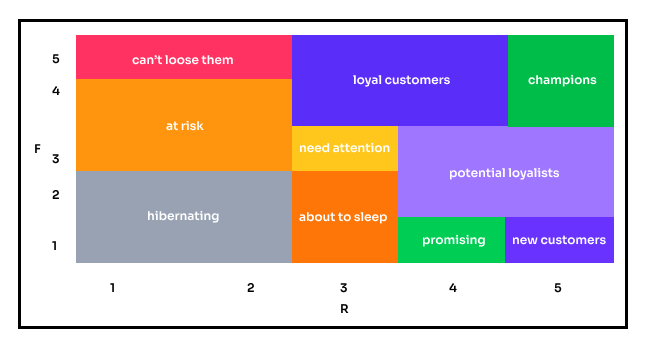

# #Business Problem

FLO is an online shoe store. They want to divide their customers into different groups and create marketing strategies for each group. To do this, customer behaviors will be analyzed, and groups will be created based on similar behaviors.

# #Dataset Story

The dataset consists of information collected from customers who made purchases at FLO in 2020-2021. These customers are OmniChannel users (shopping both online and offline). The data is based on their past shopping behaviors.

**master_id**: Unique customer number

**order_channel**: The channel used for shopping (Android, iOS, Desktop, Mobile, Offline)

**last_order_channel**: The channel used for the most recent purchase

**first_order_date**: The date of the customer's first purchase

**last_order_date**: The date of the customer's most recent purchase

**last_order_date_online**: The date of the most recent purchase on the online platform

**last_order_date_offline**: The date of the most recent purchase on the offline platform

**order_num_total_ever_online**: The total number of purchases the customer made online

**order_num_total_ever_offline**: The total number of purchases the customer made offline

**customer_value_total_ever_offline**: The total amount the customer paid for offline purchases

**customer_value_total_ever_online**: The total amount the customer paid for online purchases

**interested_in_categories_12**: The list of categories the customer has purchased from in the last 12 months

# # Project Tasks

# # Task 1: Data Understanding and Preparation

Import the necessary libraries.

In [1]:
import datetime as dt
import pandas as pd

pd.set_option ('display.max_columns',50)
pd.set_option ('display.max_rows',50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Step 1: Read the flo_data_20K.csv file. Create a copy of the dataframe.**

In [2]:
df_ = pd.read_csv ("/kaggle/input/rfm-analysis-for-customer-segmentation/flo_data_20k.csv")
df = df_.copy()

**Step 2: a )First 10 observations in the dataset**

In [3]:
df.head (10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


**b) Variable names**

In [4]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

**c.) Descriptive statistics**

In [5]:
df.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,100%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000,7.000,10.000,20.000,200.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000,4.000,7.000,109.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,10.000,59.990,89.980,110.480,140.230,179.980,220.860,281.868,365.058,519.950,694.222,1219.947,18119.140,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,12.990,84.990,125.990,173.970,219.990,286.460,371.944,491.526,690.868,1082.036,1556.726,3143.810,45220.130,45220.130


**d) Missing values**

In [6]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

e) Variable types

In [7]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

**Step 3: Omnichannel customers shop both online and offline. Create new variables for total number of purchases and spending for each customer**

In [8]:

df["total_number_of_purchases"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

df["total_spending"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

**Step 4: Check the variable types. Convert date variables to "date" type.**

In [9]:

df.dtypes
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

**Step 5: Look at the distribution of the number of customers, total products bought, and total spending across shopping channels.**

In [10]:
df.groupby("order_channel").agg({"master_id":"count",
                                 "total_number_of_purchases" :"sum",
                                 "total_spending":"sum"})

,master_id,total_number_of_purchases,total_spending
order_channel,,,
Android App,9495,52269.000,7819062.760
Desktop,2735,10920.000,1610321.460
Ios App,2833,15351.000,2525999.930
Mobile,4882,21679.000,3028183.160


**Step 6: Rank the top 10 customers who generate the most profit.**

In [11]:
df.groupby('master_id').agg({'total_spending': 'sum'}).sort_values(by='total_spending', ascending=False).head(10)

,total_spending
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.290
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.410
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.340
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.100
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240


**Step 7: Rank the top 10 customers who placed the most orders**

In [12]:
df.groupby('master_id').agg({'total_number_of_purchases': 'sum'}).sort_values(by='total_number_of_purchases', ascending=False).head(10)

,total_number_of_purchases
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.000
cba59206-9dd1-11e9-9897-000d3a38a36f,131.000
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.000
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.000
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.000
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.000
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.000
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.000
d696c654-2633-11ea-8e1c-000d3a38a36f,70.000


**Step 8: Automate the data preparation process as a function.**

In [13]:
def data_prep (dataframe):
    
    dataframe["total_number_of_purchases"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["total_spending"] = dataframe["customer_value_total_ever_online"] + dataframe["customer_value_total_ever_offline"]
    
    date_columns = dataframe.columns[dataframe.columns.str.contains("date")]
    dataframe[date_columns] = dataframe[date_columns].apply(pd.to_datetime)
    
    return df

data_prep(df).head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_number_of_purchases,total_spending
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


# #**Task 2: Calculating RFM Metrics**

**Step 1: Define Recency, Frequency, and Monetary.**

Recency: It shows how much time has passed since the customer’s last purchase.

Frequency: It shows how often the customer makes purchases in a certain period.

Monetary: It is the total amount of money the customer has spent in a certain period.

**Step 2: Calculate Recency, Frequency, and Monetary metrics for each customer.**

In [14]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [15]:
today_date = dt.datetime(2021,6,1)

In [16]:
RFM = pd.DataFrame()
RFM["master_id"] = df["master_id"]
RFM["recency"] = (today_date - df["last_order_date"]).dt.days
RFM["frequency"] = df["total_number_of_purchases"]
RFM["monetary"] = df["total_spending"]

In [17]:
RFM.head ()

,master_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980


# #Task 3: Calculating the RF Score

**Step 1: Convert the Recency, Frequency, and Monetary metrics into scores between 1-5 using qcut.**

**Step 2: Save these scores as recency_score, frequency_score, and monetary_score.**

In [18]:
RFM["recency_score"] = pd.qcut(RFM["recency"], 5, labels =[5,4,3,2,1])
RFM["frequency_score"] = pd.qcut(RFM["frequency"].rank(method="first"), 5, labels =[1,2,3,4,5])
RFM["monetary_score"] = pd.qcut(RFM["monetary"], 5, labels =[1,2,3,4,5])

In [19]:
RFM.head ()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1


**Step 3: Combine recency_score and frequency_score into one variable and save it as RF_SCORE.**

In [20]:
RFM["RF_SCORE"]= (RFM["recency_score"].astype(str) + RFM["frequency_score"].astype(str))

In [21]:
RFM.head ()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31


# #Task 4: Defining RF Score as Segments

**Step 1: Define segments for the created RF scores.**

In [22]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [23]:
RFM['segment'] = RFM['RF_SCORE'].replace(seg_map, regex=True)

In [24]:
RFM.head ()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,about_to_sleep


# #Task 5: Action Time! 

**Step 1: Check the averages of recency, frequency, and monetary for the segments.**

In [25]:
RFM.groupby("segment").agg({"recency" : ["mean", "count"],
                            "frequency" : ["mean", "count"],
                           "monetary" : ["mean", "count"]})

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      113.785  1629     2.401  1629  359.009  1629
at_Risk             241.607  3131     4.472  3131  646.610  3131
cant_loose          235.444  1200    10.698  1200 1474.468  1200
champions            17.107  1932     8.934  1932 1406.625  1932
hibernating         247.950  3604     2.394  3604  366.267  3604
loyal_customers      82.595  3361     8.375  3361 1216.819  3361
need_attention      113.829   823     3.728   823  562.143   823
new_customers        17.918   680     2.000   680  339.956   680
potential_loyalists  37.156  2938     3.304  2938  533.184  2938
promising            58.921   647     2.000   647  335.673   647

**Step 2: Use RFM analysis to find customers for the following 2 cases and save their customer IDs in a CSV file.**

**a. FLO is adding a new women's shoe brand. The product prices of the new brand are higher than the general customer preferences. Therefore, the company wants to contact customers who will be interested in the brand’s promotion and product sales. The target customers are loyal ones (champions, loyal_customers) and those who have bought from the women's category. Save the IDs of these customers in a CSV file.**

In [26]:
segment_type = (RFM[(RFM["segment"]=="champions") | (RFM["segment"]=="loyal_customers")]) 
category_type = df[(df["interested_in_categories_12"]).str.contains("KADIN")]

In [27]:
new_women_shoes_brand = pd.merge(segment_type,category_type[["interested_in_categories_12","master_id"]],on=["master_id"])

In [28]:
new_women_shoes_brand.head ()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal_customers,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal_customers,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,86,5.000,1054.690,3,4,5,34,loyal_customers,"[ERKEK, COCUK, KADIN]"
3,c2e15af2-9eed-11e9-9897-000d3a38a36f,13,20.000,2861.600,5,5,5,55,champions,"[COCUK, KADIN, AKTIFSPOR]"
4,fb840306-1219-11ea-a001-000d3a38a36f,116,8.000,923.640,3,5,4,35,loyal_customers,"[ERKEK, KADIN, AKTIFSPOR]"


In [29]:
new_women_shoes_brand_file = new_women_shoes_brand[['master_id']]
new_women_shoes_brand_file.head ()


,master_id
0,cc294636-19f0-11eb-8d74-000d3a38a36f
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
2,cfbda69e-5b4f-11ea-aca7-000d3a38a36f
3,c2e15af2-9eed-11e9-9897-000d3a38a36f
4,fb840306-1219-11ea-a001-000d3a38a36f


In [30]:
new_women_shoes_brand_file.to_csv("new_women_shoes_brand.csv")

**b. A 40% discount is planned for men's and children's products. The company wants to target customers who have previously bought from the relevant categories, have not made a purchase for a long time, are at risk of being lost, those who are dormant, and new customers. Save the IDs of these customers in a CSV file.**



In [31]:
men_segment_type = RFM[RFM["segment"].str.contains("at_Risk|cant_loose|about_to_sleep|new_customers")]
men_child_category_type = df[df["interested_in_categories_12"].str.contains("ERKEK|COCUK")]

In [32]:
men_child_discount = pd.merge(men_segment_type,men_child_category_type[["interested_in_categories_12","master_id"]],on=["master_id"])

In [33]:
men_child_discount.head ()

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment,interested_in_categories_12
0,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,at_Risk,"[ERKEK, KADIN]"
1,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about_to_sleep,"[AKTIFCOCUK, COCUK]"
2,13ed97a4-b167-11e9-89fa-000d3a38a36f,288,8.000,932.360,1,5,4,15,cant_loose,"[AKTIFCOCUK, COCUK, KADIN]"
3,d9b77226-a509-11e9-a2fc-000d3a38a36f,202,5.000,495.250,2,4,3,24,at_Risk,[COCUK]
4,4fbb0cbe-9085-11ea-af25-000d3a38a36f,123,2.000,242.450,3,1,1,31,about_to_sleep,"[COCUK, KADIN]"


In [34]:
men_child_discount_file = men_child_discount[['master_id']]
men_child_discount_file.head ()

,master_id
0,69b69676-1a40-11ea-941b-000d3a38a36f
1,1854e56c-491f-11eb-806e-000d3a38a36f
2,13ed97a4-b167-11e9-89fa-000d3a38a36f
3,d9b77226-a509-11e9-a2fc-000d3a38a36f
4,4fbb0cbe-9085-11ea-af25-000d3a38a36f


In [35]:
men_child_discount_file.shape

(3643, 1)

In [36]:
men_child_discount_file.to_csv("men_child_discount.csv")